# CMSC422 Final Project

By: Jonathan Gong, Andrew McNamara, John McAdoo

In [35]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import numpy as np

## Introduction

For our project, we will be evaluating the performance of different machine learning techniques on the process of predicting whether an email is spam or not. We will be using the dataset found [here](https://www.kaggle.com/datasets/somesh24/spambase) as the source of our information for training and testing.


This dataset collects emails from a variety of different sources of spam, including "advertisements for products/websites, make money fast schemes, chain letters, pornography, and more." The collection of emails labeled as non-spam come from"filed work and personal e-mails." The data itself largely contains information attributes containing information regarding how frequently a word or character occured in the email.

For instance, any column name matching the description: "word_freq_WORD" is intended to mean: "the percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A “word” in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string."

#### *add more here*


## 1. Data Exploration

In [36]:
# Reading in the dataset
df = pd.read_csv('spambase_csv.csv')

In [37]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1a. Displaying the column names and their datatype

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### 1b. Summary Statistics

In [39]:
display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 2. Data Visualization

## 3. Data Manipulation

### 3a. Splitting the Data into Test and Training Datasets

In [40]:
X = df.loc[:, df.columns != 'class']
Y = df[['class']]

In [41]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 1239)

In [42]:
print("Shape of Original Data is {}".format(df.shape))
print("Shape of Training Data is X: {} and Y: {}".format(train_x.shape, train_y.shape))
print("Shape of Test Data is X: {} and Y: {}".format(test_x.shape, test_y.shape))

Shape of Original Data is (4601, 58)
Shape of Training Data is X: (3680, 57) and Y: (3680, 1)
Shape of Test Data is X: (921, 57) and Y: (921, 1)


### 3b. Scaling/Standardizing the Data

This step is likely not entirely necessary given the relatively tame nature of the dataset already. However, it is still worth persuing given the diversity of techniques we will be implementing as well as the (likely) marginal nature of the process. 

In [43]:
# Centering the features and scaling to unit variance
scaler = StandardScaler()

train_x_std = scaler.fit_transform(train_x)
test_x_std = scaler.transform(test_x)

## 1. Model #1: K-Nearest Neighbors

Steps (loosely) followed from this website: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

### a. Determining what k-value to use using Cross-Validation

In [44]:
k_values = [i for i in range(1, 20)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X, Y, cv = 5)
    scores.append(np.mean(score))

/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array 

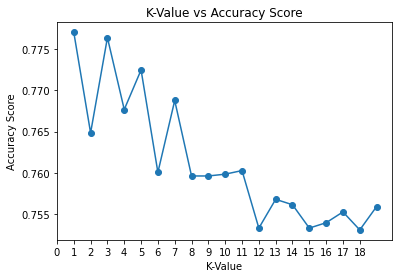

In [45]:
plt.title("K-Value vs Accuracy Score")
plt.xlabel("K-Value")
plt.ylabel("Accuracy Score")
plt.plot(k_values, scores, marker = 'o')
plt.xticks(np.arange(0, len(k_values), 1.0))
plt.show()

### b. Training the Model

In [46]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(train_x, train_y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [47]:
y_pred = knn.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8121606948968513
Precision: 0.7578347578347578
Recall: 0.751412429378531


## Is this data Linearly separable?
Considering the fact that we are trying to perform binary classification on this data, it makes sense to check if the data is linearly separable. We can do this by training a Perceptron. Since a perceptron is guaranteed to converge if the data is linearly separable, we will see if we can get 100% accuracy using this Perceptron.

In [48]:
from sklearn.linear_model import Perceptron
spam_perceptron = Perceptron(max_iter=1000000, random_state=0, fit_intercept=True, eta0=0.05)
spam_perceptron.fit(X,Y)

y_pred = spam_perceptron.predict(X)
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.5931319278417735
Precision: 0.49192886456908347
Recall: 0.9917264202978489


/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can see that we did not end up with 100% accuracy, leading us to conclude the data is not linearly separable. We also got poor accuracy and precision scores on our data, so the perceptron is not a good model for predicting for spam email.

## PCA
To get a better idea of how the data separates, we will do PCA to get the two highest eigenvectors of variance and see how they graph. We can see that taking the first two principal components explains 0.99806998 of the variance, so looking at this graph should illuminate how the data separates. As we an see from the overlap, this is not linearly separable, and it makes sense that the perceptron functioned so poorly. 

[0.92702701 0.07104297]


<function matplotlib.pyplot.show(close=None, block=None)>

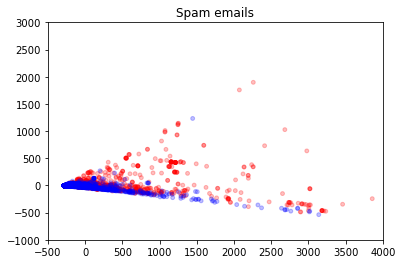

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(X)
principal_components=principal_components.T
colors = []
for y in Y["class"]:
    if y ==1:
        colors.append("red")
    else:
        colors.append("blue")
plt.scatter(principal_components[0],principal_components[1],c=colors,alpha = .25,s=15)
plt.xlim([-500,4000])
plt.ylim([-1000,3000])
plt.title("Spam emails")
plt.show